In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans



In [ ]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')


In [ ]:
# Data Preprocessing
# Remove unnecessary data
df.drop(['CustomerID'], axis=1, inplace=True)

In [ ]:
# Handle missing data (if any)
df.dropna(inplace=True)

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Data Exploration
# Descriptive statistics
print(df.describe())




              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


In [ ]:
# Data types
print(df.dtypes)


Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


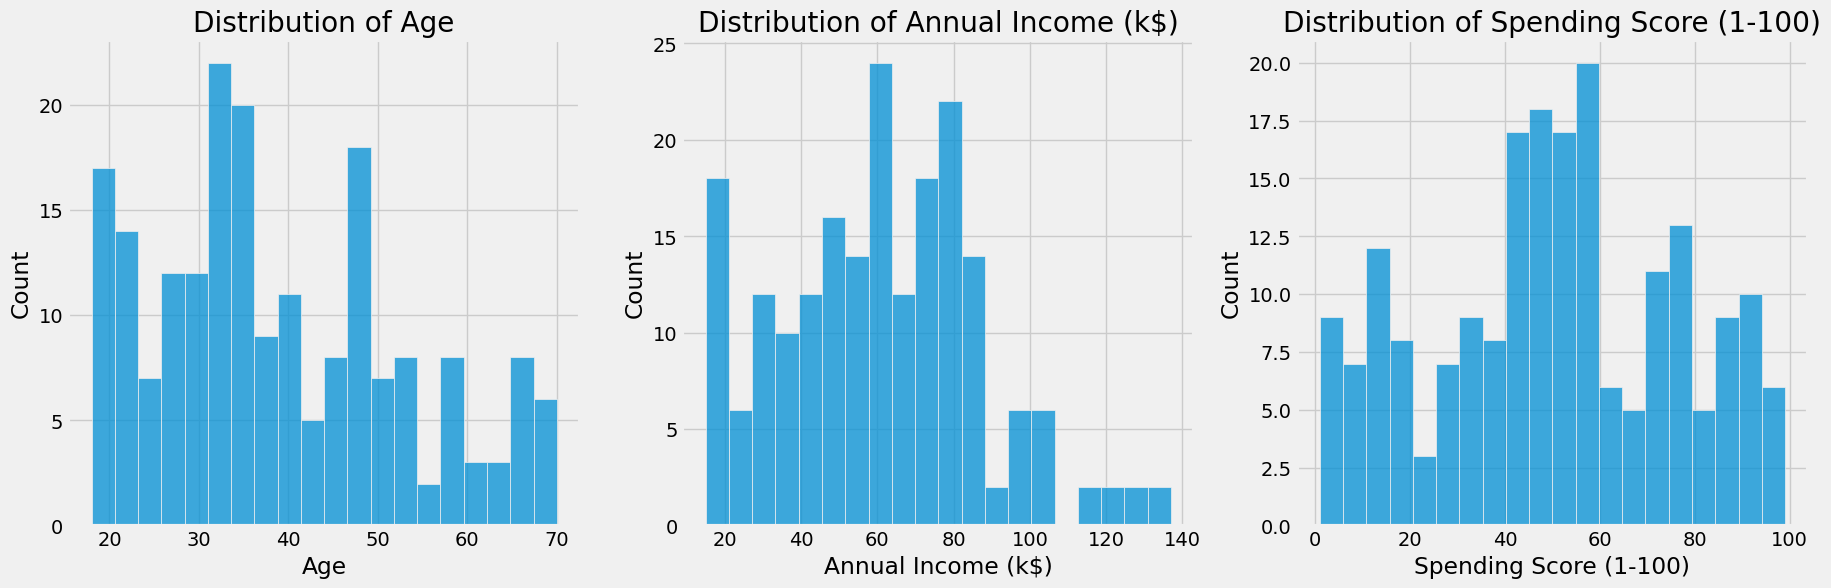

In [ ]:
# Univariate Analysis (Phân tích đơn biến)
plt.style.use('fivethirtyeight')
plt.figure(1, figsize=(20, 6))
for i, feature in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], bins=20)
    plt.title('Distribution of {}'.format(feature))
plt.show()

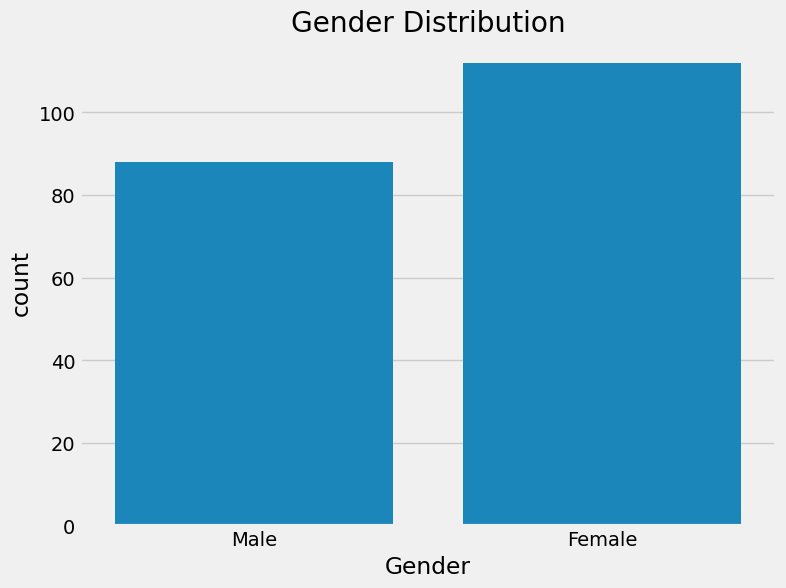

In [ ]:
# Countplot for Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

<Figure size 1500x1000 with 0 Axes>

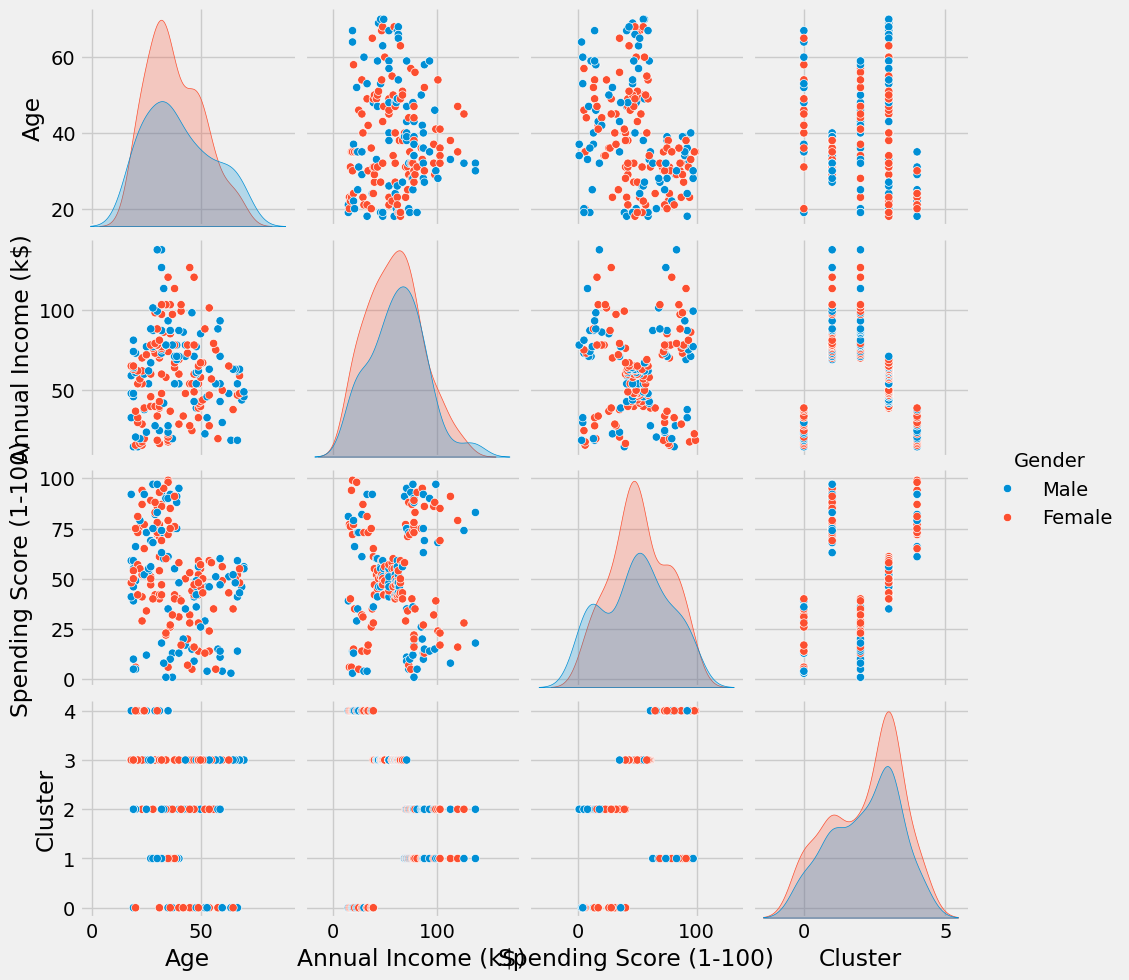

In [ ]:
# Bivariate Analysis (Phân tích đa biến)
plt.figure(figsize=(15, 10))
sns.pairplot(df, hue='Gender', diag_kind='kde')
plt.show()


<ipython-input-13-26cffb8c5800>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


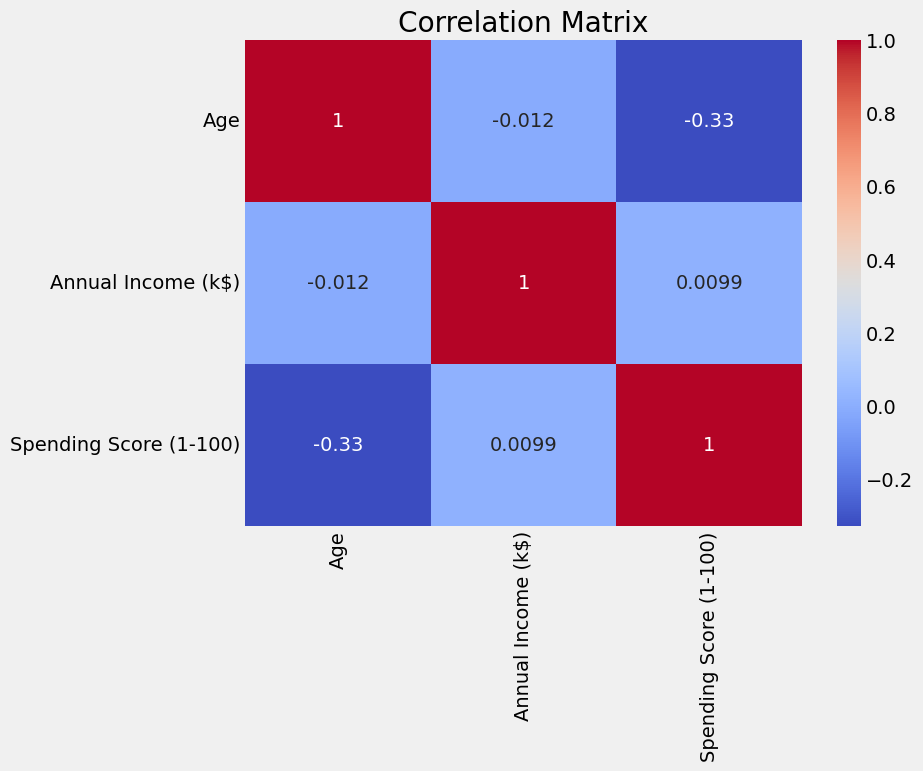

In [ ]:
# Correlation Matrix (Ma trận tương quan)
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# K-means Clustering
# Feature selection
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# K-means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

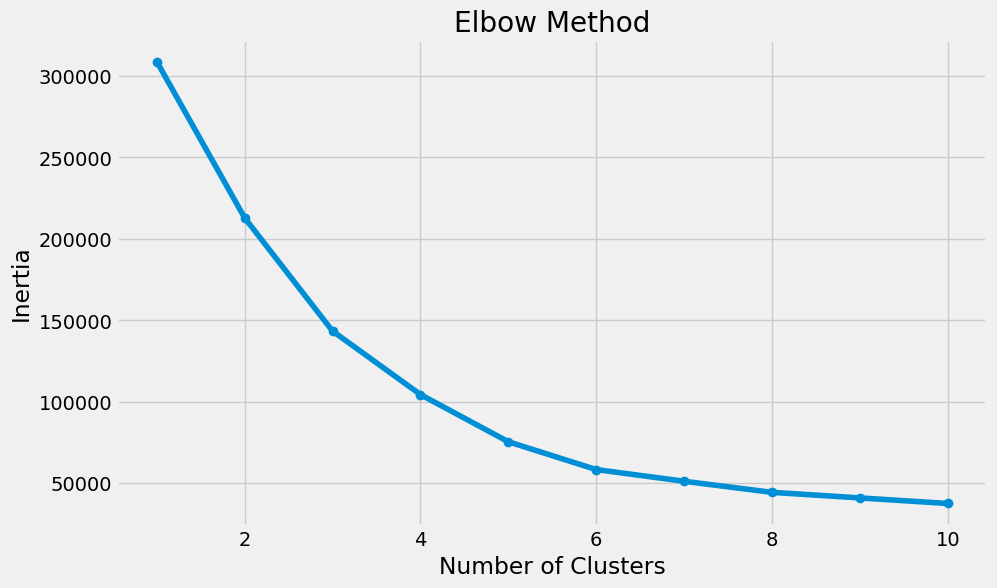

In [ ]:
# Elbow method to find optimal number of clusters
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

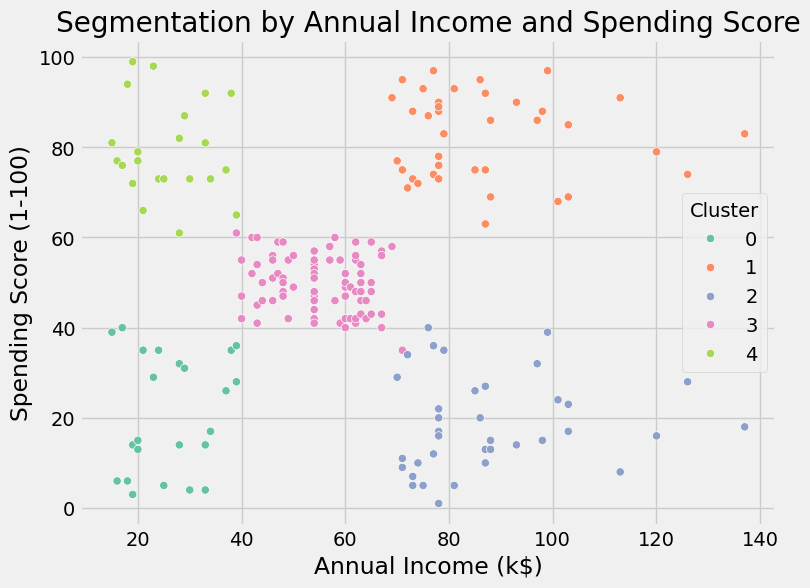

In [ ]:
# Create a scatter plot for segmentation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set2')
plt.title('Segmentation by Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


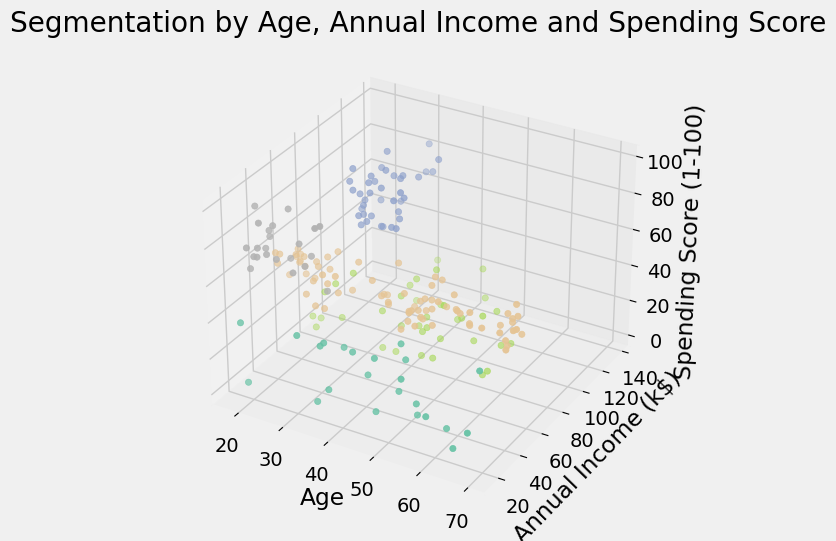

In [ ]:
# Create a 3D scatter plot for segmentation
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='Set2')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Segmentation by Age, Annual Income and Spending Score')
plt.show()


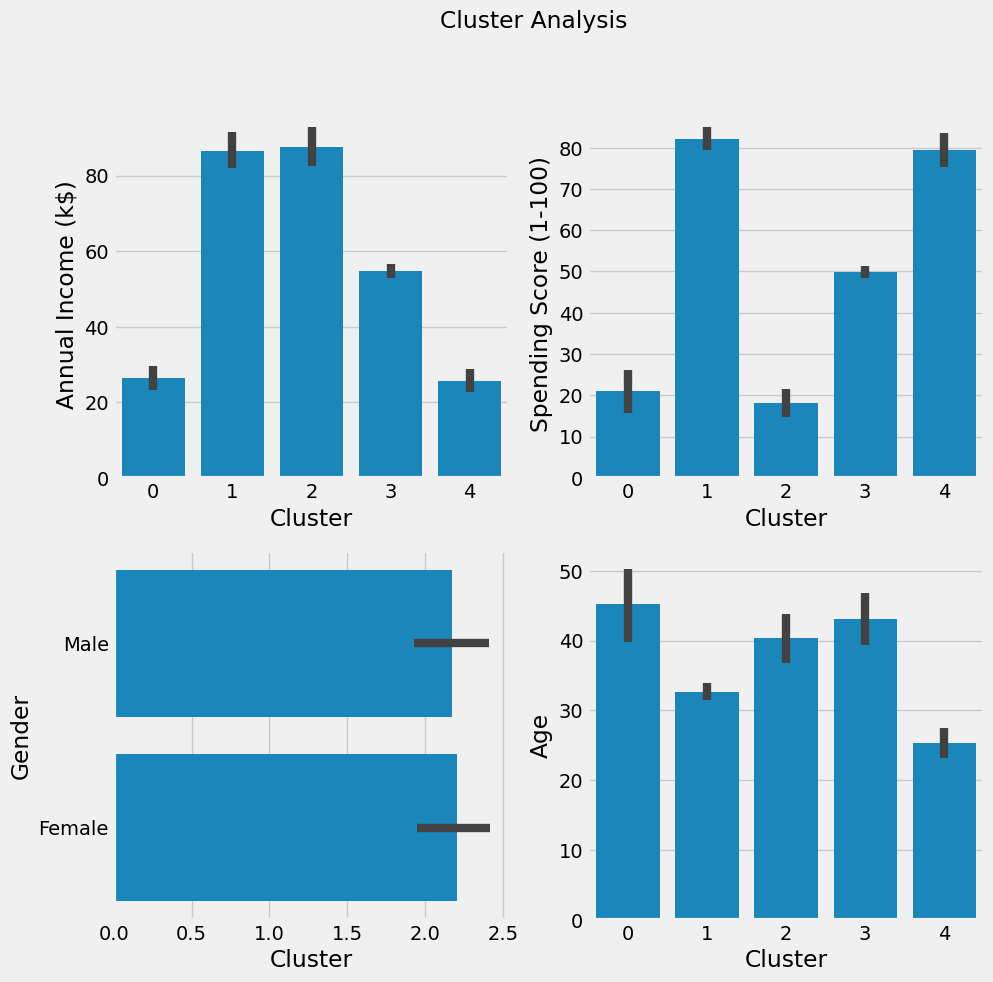

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Cluster Analysis')

# Annual Income
sns.barplot(ax=axes[0, 0], x='Cluster', y='Annual Income (k$)', data=df)  # Use df instead of median_df

# Spending Score
sns.barplot(ax=axes[0, 1], x='Cluster', y='Spending Score (1-100)', data=df)

# Gender (assuming you have a 'Gender' or 'Female' column)
sns.barplot(ax=axes[1, 0], x='Cluster', y='Gender', data=df)  # Adjust column name if needed

# Age
sns.barplot(ax=axes[1, 1], x='Cluster', y='Age', data=df)

plt.show()